<a href="https://colab.research.google.com/github/fbkaragoz/notebooks/blob/main/eksi_eda_29_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd


In [2]:
arc_path = '/content/drive/MyDrive/2 - work/2.9.0 — ekşifikir/eksi_db.tar.gz'


# decompress the file with -xvf -->
#   -x: extract
#   -v: verbose
#   -f: file

!tar -xvf "$arc_path" -C .

eksi_db/
eksi_db/eksi.db


In [3]:
dbp = '/content/eksi_db/eksi.db'

conn = sqlite3.connect(dbp)

tables =\
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

tables


,name
0,topics
1,entries
2,references_map
3,sqlite_stat1


In [4]:
schema =\
pd.read_sql_query("PRAGMA table_info(entries);", conn)

schema

,cid,name,type,notnull,dflt_value,pk
0,0,entry_id,TEXT,0,None,1
1,1,topic_id,TEXT,0,None,0
2,2,title,TEXT,0,None,0
3,3,author_hash,TEXT,0,None,0
4,4,favorites,INTEGER,0,None,0
5,5,created_at_ts,TEXT,0,None,0
6,6,created_at_raw,TEXT,0,None,0
7,7,text_clean,TEXT,0,None,0
8,8,url,TEXT,0,None,0
9,9,text_hash,TEXT,0,None,0


In [5]:
entries = pd.read_sql_query("SELECT * FROM entries;", conn)

topics = pd.read_sql_query("SELECT * FROM topics ORDER BY RANDOM() LIMIT 5;", conn)

references_map = pd.read_sql_query("SELECT * FROM references_map ORDER BY RANDOM() LIMIT 5;", conn)

entries.head()

,entry_id,topic_id,title,author_hash,favorites,created_at_ts,created_at_raw,text_clean,url,text_hash,crawl_ts
0,179182040,8036823,3 yıldır evden çıkmayan gencin evden çıkarılması,a9e5be5a0082c6c31a6dc910e3352eac5672d202ef7fa1...,0,2025-10-17T17:26:00,17.10.2025 17:26,https://x.com/…rbandicom/status/19791015344419...,https://eksisozluk.com/3-yildir-evden-cikmayan...,2f60d585b3f53765b6ce9e14cdd6473fdad80fea4d3e61...,2025-10-17T16:01:02.648953
1,179182267,8036823,3 yıldır evden çıkmayan gencin evden çıkarılması,3a2f0017065ab43336760c8cecf4986bbaab10efd28209...,0,2025-10-17T17:38:00,17.10.2025 17:38,"benim anladığım, bizler sağlıklı düşünüp tembe...",https://eksisozluk.com/3-yildir-evden-cikmayan...,aea183a5e5191c327ab5fb9aa36f2a93059b615d7be9d2...,2025-10-17T16:01:02.648953
2,179182426,8036823,3 yıldır evden çıkmayan gencin evden çıkarılması,590c9da2bf0c11b2967d66749188f00d574cbb59208e51...,0,2025-10-17T17:46:00,17.10.2025 17:46,bu genci tedavi etmenin çok basit bir yolu var...,https://eksisozluk.com/3-yildir-evden-cikmayan...,960ace213db65b159822db252a5078a9a8d336ba07dc2d...,2025-10-17T16:01:02.648953
3,179182509,8036823,3 yıldır evden çıkmayan gencin evden çıkarılması,7c4768cab477b28f3d065b5b47184e821a9bca72b1f937...,0,2025-10-17T17:50:00,17.10.2025 17:50,çocuk derin bir depresyonda ve tek derdi tıraş...,https://eksisozluk.com/3-yildir-evden-cikmayan...,5f66285026d3f4f716591f823867a6fa5f9f9dd673e0a9...,2025-10-17T16:01:02.648953
4,179182510,8036823,3 yıldır evden çıkmayan gencin evden çıkarılması,0fc0161ae3cf08094f94e92c0ee794abaca1c5030acfd4...,0,2025-10-17T17:50:00,17.10.2025 17:50,allah'tan evden çıkmak istemiyormuş. es kaza s...,https://eksisozluk.com/3-yildir-evden-cikmayan...,60a88c82b18a0297c9dc0c60ba15c83d6ceb79851056d3...,2025-10-17T16:01:02.648953


<Axes: title={'center': 'Aylık Entry Sayısı'}, xlabel='year_month'>

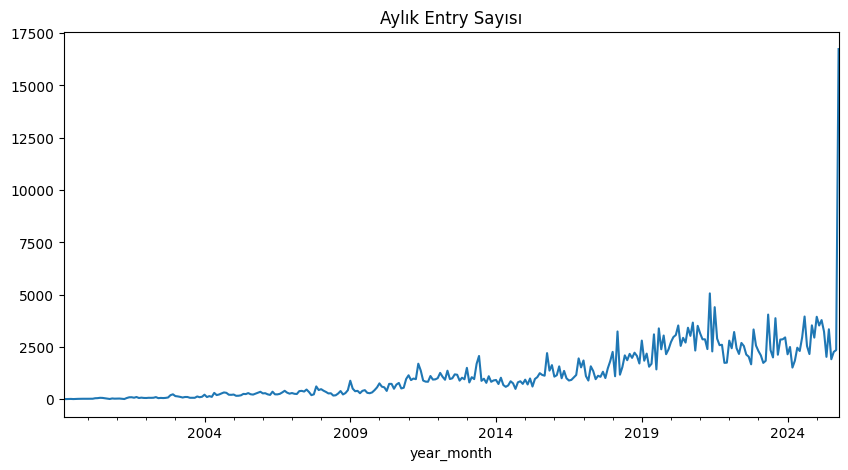

In [6]:
entries['created_at_ts'] =\
pd.to_datetime(entries['created_at_ts'], errors='coerce')

entries['year_month'] = entries['created_at_ts'].dt.to_period('M')
entries.groupby('year_month').size().plot(kind='line', figsize=(10,5), title='Aylık Entry Sayısı')

<Axes: title={'center': 'Top 20 Yazar'}, xlabel='author_hash'>

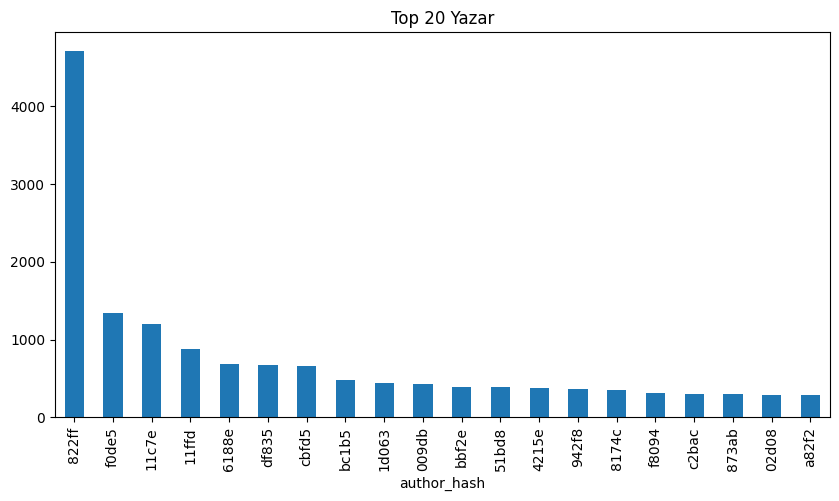

In [7]:
top_authors = entries['author_hash'].value_counts().head(20)
top_authors.index = top_authors.index.str[:5]
top_authors.plot(kind='bar', figsize=(10,5), title='Top 20 Yazar')

# Task
Analyze the ratio of entries to topics for the top 10 authors in the dataset.

## Identify top 10 authors

### Subtask:
Determine the top 10 authors based on the number of entries they have.


**Reasoning**:
Count the occurrences of each author hash and select the top 10.



In [8]:
top_10_authors = entries['author_hash'].value_counts().head(10).index.tolist()
top_10_authors_truncated = [author[:5] for author in top_10_authors]

print(top_10_authors_truncated)

['822ff', 'f0de5', '11c7e', '11ffd', '6188e', 'df835', 'cbfd5', 'bc1b5', '1d063', '009db']


## Analyze for Clustering

###1. Data Preparation for Clustering

This first step is about defining what ***feature*** is to be our similarity metric to begin clustering.

  We can start with ***topic clustering*** and ***user clustering (truncuated hashes)***.

We can actually hit on two different ways how to profile a "topic".

1. By its content:
  what is the topic about.

2. By its activitiy:
  how much do people talk about it (entry counts).

Note:
Since a single user might write multiple times under the same topic, we can use user_hashes to reduce overth-interests.


In [9]:
# entries =\
# pd.read_sql_query("SELECT * FROM entries;", conn)
#
# topics =\
# pd.read_sql_query("SELECT * FROM topics ORDER BY RANDOM() LIMIT 5;", conn)

topics_text_df =\
pd.read_sql_query("SELECT topic_id, GROUP_CONCAT(text_clean) AS combined_text FROM entries GROUP BY topic_id;", conn)

display(topics_text_df.head())

,topic_id,combined_text
0,1004129,orhan silier ve silier'in ilk eşi oya köymen '...
1,1007699,tosun paşa filmindeki sana noluyo denilecek in...
2,1007963,"(bkz: alternatif smeagol gollum diyaloglari ),..."
3,1037199,en popülerlerinden bir sözlük celebrity’si ile...
4,1076205,türk bilim kadını. --- kopyala paste et --- bo...


If one user writes 100 entries on a topic, their words will dominate the topic's "profile."

Let's handle this. Instead of one big step, we can use two:

Step 1 (Inner Query): First, let's aggregate all the text for each user on each topic. This creates a "document" for that user's opinion on that topic.

Step 2 (Outer Query): Then, we'll combine those "user documents" to create the final, balanced "topic document."

In [10]:
user_topic_texts_df =\
pd.read_sql_query(
    "SELECT author_hash, topic_id, GROUP_CONCAT(text_clean) AS combined_text FROM entries GROUP BY author_hash, topic_id;",
    conn
)

display(user_topic_texts_df.head())

,author_hash,topic_id,combined_text
0,000024ba3e0101a16dbfa23b233a063c01506a2535d693...,31810,3 harften oluşmaktadır.
1,000191e0b97192451d939eb4da8ec01e2084b3d7ac206f...,4779387,adam icin risklidir. kız daha en az 5 kere değ...
2,000191e0b97192451d939eb4da8ec01e2084b3d7ac206f...,913893,jon hamm ile kadıköy barlar sokağında yanımızd...
3,0001b996ed852ba179dc4aa6c7f93d2415352603a0fb89...,32715,son yıllarda kendisinin çizgisinden saptığına ...
4,0001b9d5278952644c31af93fbcabaf1c82d5dcd603276...,1848393,"tum dunyanin icine sican sey, kurdugumuz siste..."


We'll treat the first query as a temporary table. In SQL, the cleanest way to do this is with a Common Table Expression (CTE). It creates a temporary result set (like a mini-table) that we can use in a second query right afterward.



In [11]:
sql_query = """
WITH UserDocsPerTopic AS (
    -- Step 1: Your first query (the "mini-table")
    -- This part runs first, creating a temporary table *inside the database*
    SELECT
        topic_id,
        author_hash,
        GROUP_CONCAT(text_clean) AS user_text
    FROM entries
    GROUP BY topic_id, author_hash
)

-- Step 2: Your main query that uses the "mini-table"
-- This part runs second, on the results of Step 1
SELECT
    topic_id,
    GROUP_CONCAT(user_text) AS final_topic_text
FROM UserDocsPerTopic
GROUP BY topic_id
"""
print("Running the two-step SQL query...")
topic_texts_df = pd.read_sql_query(sql_query, conn)

print("Query complete!")
print(topic_texts_df.head())


Running the two-step SQL query...
Query complete!
  topic_id                                   final_topic_text
0  1004129  boğaziçi felsefe'de açtığı her dersi büyük bir...
1  1007699  taşıdığım ünvan,ölmeden evvel akbank film fest...
2  1007963  şubat - duble monolog,- ben bi zamanlar bizdim...
3  1037199  rüya başlığına mistik rüyalar gördüğümü yazdık...
4  1076205  türk bilim kadını. --- kopyala paste et --- bo...


## 2. Feature ENgineering

Right now, our data for each topic is just one very long string of words. A clustering algorithm, like k-means, only understands numbers not texts.

Our current job is to turn that messy text into a clean, numerical profile for each topic.

**TF-IDF** is a perfect tool for this.



When we set up this tool, we will want to give some instructions:

1. stop_words
2. `max_df=0.8`: This says "ignore words that appear in more than 80% of all topics". (which are too common to be unique)
3. `min_df=10`: This says "ignore words that appear in fewer than 10 topics." (These are too rare to form a pattern).
4. `ngram_range=(1,3)`: This tells it to look for a single words (1-grams), two-word phrases (2-grams) AND 3-word phrses (3-grams) since Turkish has unique phrases that are not-rarely composed in three word structure (e.g., 'başının etini yemek').


In [12]:
# For Turkish stopwords and other utils let me introduce you to my own NLP toolkit for Turkish.
# Still in development but might use it here.
%pip install durak-nlp==0.2.0

In [13]:
from durak import clean_text, tokenize, stopwords

text = "Türkiye'de NLP zor mu? Durak kolaylaştırır!"
tokens = tokenize(clean_text(text))
print(tokens)

["türkiye'de", 'nlp', 'zor', 'mu', '?', 'durak', 'kolaylaştırır', '!']


In [14]:
from durak import (
    clean_text,         # all in one cleaning
    normalize_case,     # case normalization
    normalize_unicode,  # unicode normalization
    collapse_whitespace # remove extra spaces
)

from durak.stopwords import (
    BASE_STOPWORDS,           # default Turkish stopwords
    StopwordManager,          # main stopword manager
    load_stopword_resource,   # load from metadata
    load_stopwords            # load from file
)

print(len(BASE_STOPWORDS))

82


## Let's Build

To get the `TfidfVectorizer` and get stopwords from dura `durak`

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from durak import BASE_STOPWORDS

In [16]:
tfidf_vectorizer =\
TfidfVectorizer(stop_words=list(BASE_STOPWORDS), lowercase=False, ngram_range=(1,3), max_df=0.8, min_df=10)

The next step is to use the machine. The method to both "learn" the vocabulary from the text (fit) and "convert" the text into numbers (transform) is called `.fit_transform()`.

In [17]:
numeric_tfidf =\
tfidf_vectorizer.fit_transform(topic_texts_df['final_topic_text'])


## PCA (Principal Component Analysis)

Our features make sense before we commit to clustering them.

PCA is a powerful tool from scikit-learn that's perfect for "squishing" tens of thousands of dimensions (your TF-IDF features) down into just two dimensions `(x and y)` that we can plot on a scatter graph.

PCA finds the two new "axes" that capture the most variance (the most information) in your data.


In [18]:
from sklearn.decomposition import PCA

pca_machine = PCA(n_components=2)
pca_topic = pca_machine.fit_transform(numeric_tfidf.toarray())


## What We Have Now?

We have new variable, `pca_topic`, which is a NumPy array.

It is not a DataFrame anymore, just a raw array with two columns ('component 1', 'component 2')

In [19]:
pca_df = pd.DataFrame(pca_topic, columns=['col-1', 'col-2'])

## Visualizing the Topics

THe whole reason we did this was to "see" our topic distribution.

The next step is to create a 2D scatter plot.

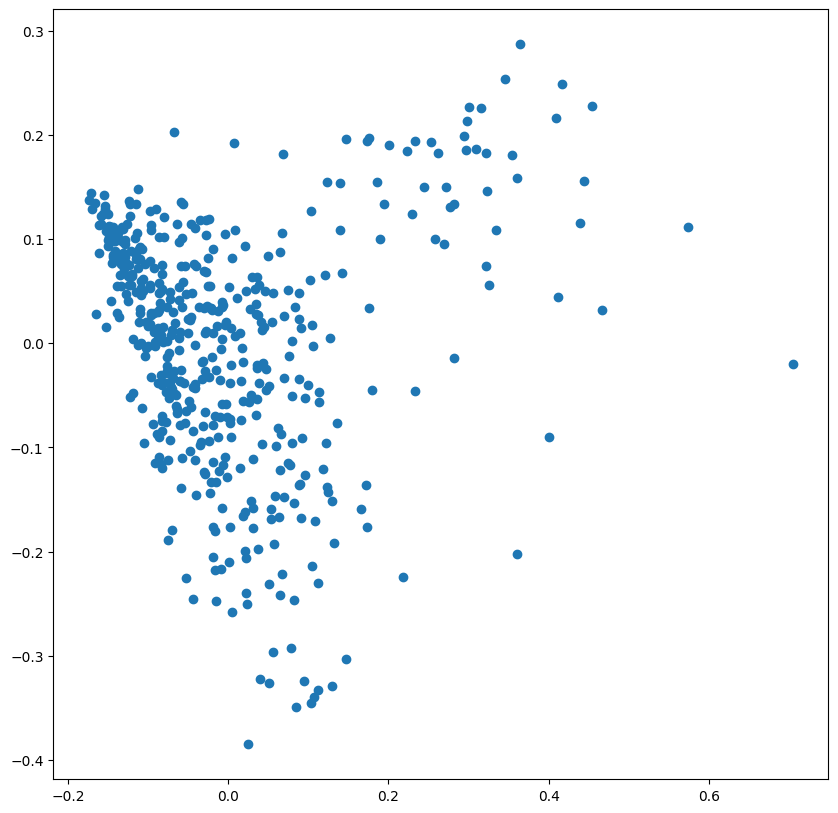

In [20]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(pca_df['col-1'], pca_df['col-2'])
plt.show()

## What the Plot Shows

- **Each Dot is a Topic**: Every single dot on that chart is one of our topics (one topic_id).
- **The Columns**: They are not "favorites" or "entry counts". They are abstract.
- **Proximity**: The dots that are ***close together*** use similar, unique n-grams according to our TF-IDF scores. Dots that are ***far apart*** are topics that are very different in their language.


## Next Step: K-Means Clustering

This plot is a great visual guide, but it doesn't give us hard boundaries. That's where K-Means comes in. It will mathematically find the "centers" of the clumps (even if they overlap a bit, like in your plot) and assign each topic (dot) to its nearest center.


The big question for K-Means is always: ***How many clusters (K)*** should we ask it to find?

- We'll run K-Means not just once, but multiple times (e.g., for K=2, K=3, K=4, ... all the way to K=10).

In [21]:
from sklearn.cluster import KMeans

## The Elbow Method

We used `pca_topic` (the 2D data) to visualize the data. But it's a lossy summary—we lost a lot of information squishing it down from 50,000+ dimensions to just 2.

For the actual clustering, we want to use the most accurate data we have. That would be the original, high-dimensional `numeric_tfidf` matrix, as it contains all the rich detail about word usage.

So, let's use numeric_tfidf for the Elbow Method.

> Our goal is to run KMeans for several different values of 'k' (e.g., 2, 3, 4... 10) and save the "inertia" score for each one.

In [22]:
inertia_scores = []
for k in range(2,20):
  kmeans_machine = KMeans(n_clusters=k)
  kmeans_machine.fit(numeric_tfidf)
  inertia_scores.append(kmeans_machine.inertia_)

We now have all the data we need to make the "elbow plot."

We need to plot the K values (x-axis) against the inertia scores (y-axis).

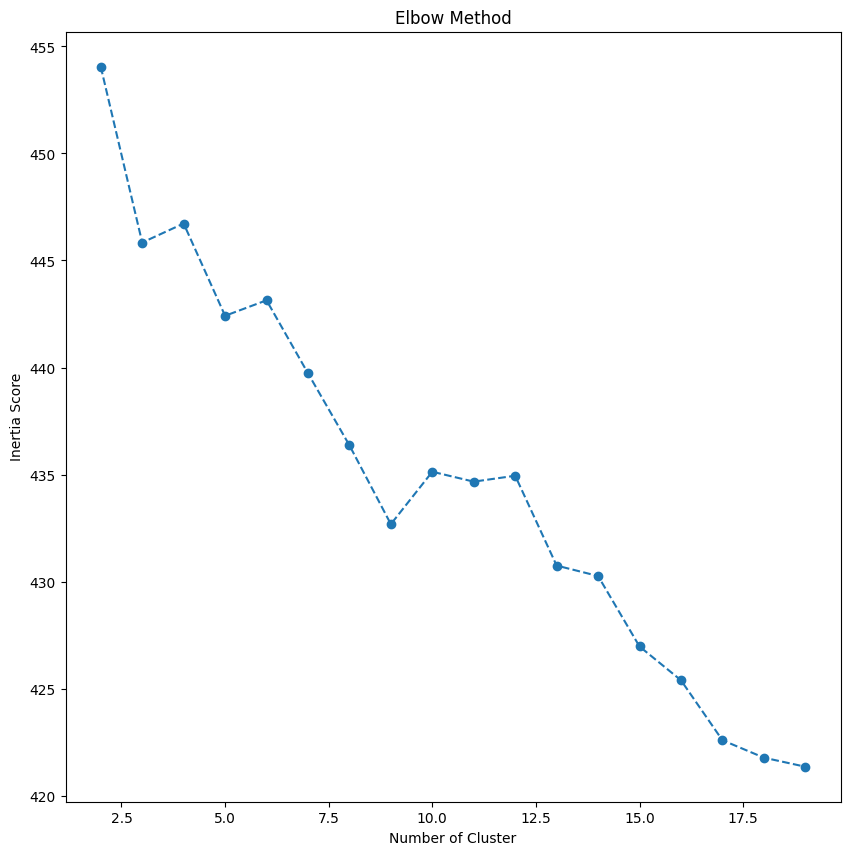

In [23]:
# scatter plot
plt.figure(figsize=(10,10))
plt.plot(range(2,20), inertia_scores, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia Score')
plt.show()

## Interpreting the Elbow Plot

- **X-Axis (num of clusters)**: This shows the different values of 'K' we tested (from 2 up to 10).
- **Y-Axis (Inertia Score)**: This measures how spread out the points are _within_ each cluster.

***LOWER IS BETTER***: It means the clusters are tight and well-defined.

>The "elbow" point is often considered the best balance between having enough clusters to capture the structure and not having too many unnecessary ones.



## Silhouette Score

I ran elbow plot with K ranging from 2 to 40 at max. Because the elbow plot failed to give us a clear answer, we should use a better, more powerful method.

Instead of just guessing K=6, we can calculate the best 'K'. But this time we will save the `silhouette score` for each 'K'. The highest score is the one we should use.

In [28]:
from cuml.cluster import KMeans
from cuml.metrics.cluster import silhouette_score # cuML also has silhouette_score

silhouette_scores = []
for k in range(2,30):
  kmeans_machine = KMeans(n_clusters=k)
  kmeans_machine.fit(numeric_tfidf.toarray())
  silhouette_scores.append(silhouette_score(numeric_tfidf.toarray(), kmeans_machine.labels_))

Text(0, 0.5, 'Silhouette Score')

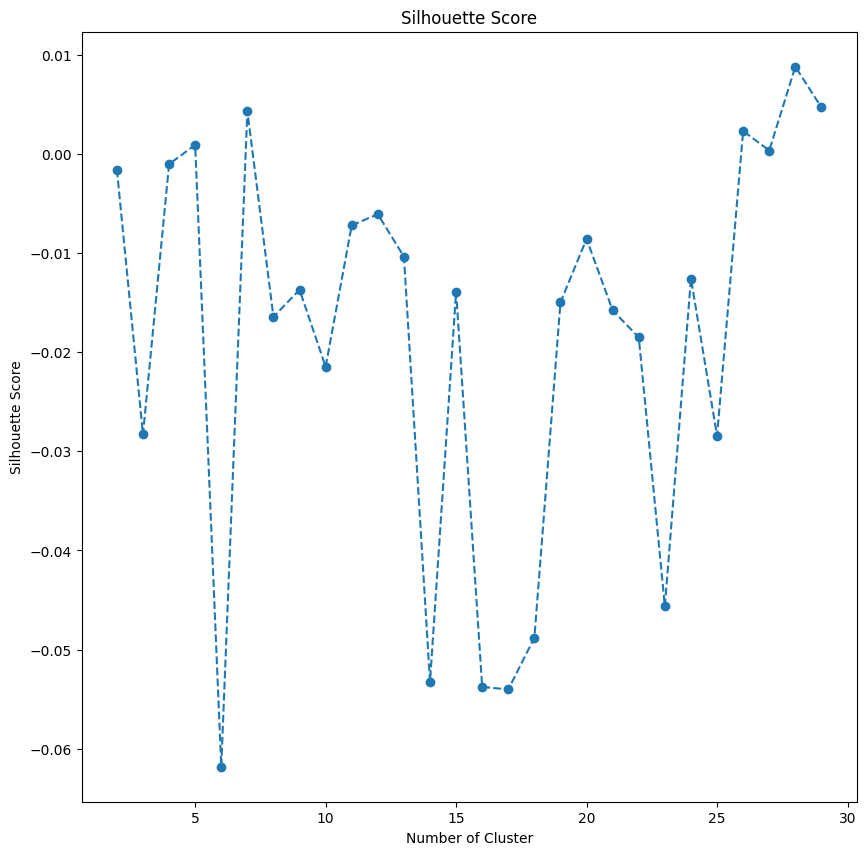

In [29]:
plt.figure(figsize=(10,10))
plt.plot(range(2,30), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')

In [37]:
# sort from highest to lowest point and map which 'K' it is

for x in sorted(zip(silhouette_scores, range(2,30)), reverse=True):
  print(x)

(0.00877726973862798, 28)
(0.004669860622680547, 29)
(0.004302818831828193, 7)
(0.00229434179067906, 26)
(0.0008925289437451181, 5)
(0.0003276256362900552, 27)
(-0.0010513333155423882, 4)
(-0.0015945587022482275, 2)
(-0.0060939405186105165, 12)
(-0.007214490176281742, 11)
(-0.008591680611096211, 20)
(-0.010367641395117389, 13)
(-0.012590967894469734, 24)
(-0.01371208558423835, 9)
(-0.013890525604892913, 15)
(-0.014976150330130807, 19)
(-0.015793716866294317, 21)
(-0.01644915455648036, 8)
(-0.018513512293898478, 22)
(-0.021478356705963996, 10)
(-0.02830143201058277, 3)
(-0.028442925262943945, 25)
(-0.04561575324064827, 23)
(-0.04880103170482771, 18)
(-0.05324655759117414, 14)
(-0.05376214373944827, 16)
(-0.05401088101397652, 17)
(-0.06180667293433878, 6)


## Results

One thing is certain here. The silhouette score overlaps a lot.

Let's use the first positive spike (K=7) and use it as our Kmeans object.

In [38]:
from sklearn.cluster import KMeans

# Create a KMeans model with 7 clusters
kmeans_model = KMeans(n_clusters=7, random_state=42, n_init=10) # Added random_state for reproducibility and n_init

# Fit the model and predict the clusters
topic_clusters = kmeans_model.fit_predict(numeric_tfidf)

# Display the first few cluster labels
print(topic_clusters[:10])

[2 2 3 3 2 5 5 2 2 4]


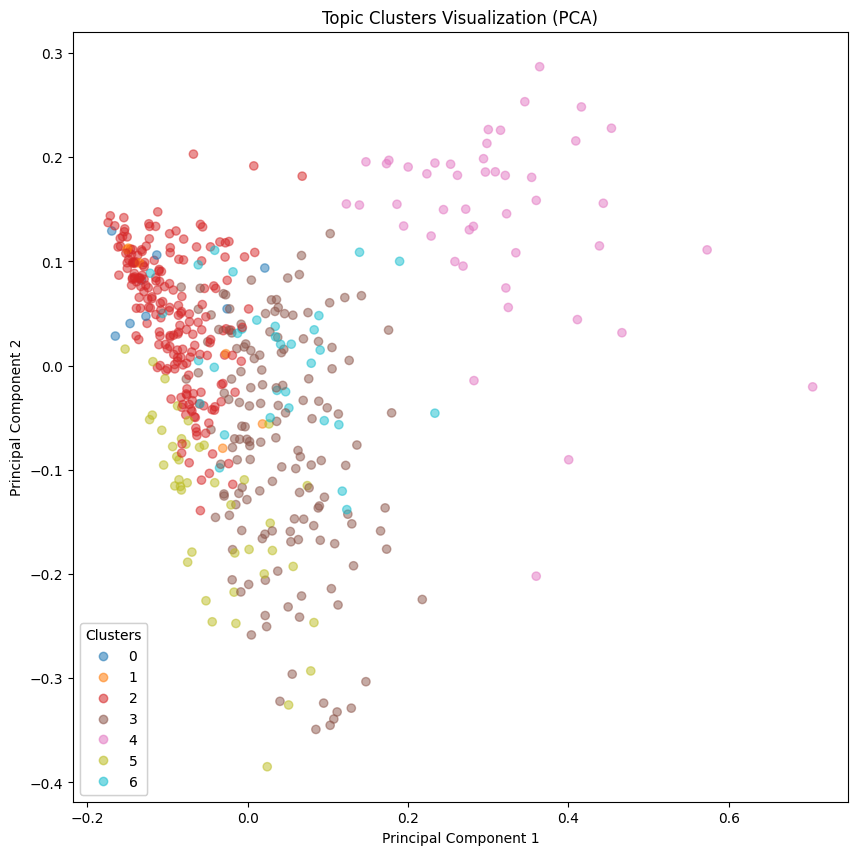

In [40]:
# Add the cluster labels to the pca_df DataFrame
pca_df['cluster'] = topic_clusters

# Create a scatter plot colored by cluster
plt.figure(figsize=(10, 10))
scatter = plt.scatter(pca_df['col-1'], pca_df['col-2'], c=pca_df['cluster'], cmap='tab10', alpha=0.5) # Changed cmap to 'tab10'
plt.title('Topic Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend to show the cluster colors
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

In [41]:
# Get the cluster centers (average TF-IDF scores for each cluster)
cluster_centers = kmeans_model.cluster_centers_

# Get the list of n-grams (feature names)
feature_names = tfidf_vectorizer.get_feature_names_out()

print("Shape of cluster centers:", cluster_centers.shape)
print("Number of feature names:", len(feature_names))

Shape of cluster centers: (7, 180693)
Number of feature names: 180693


In [42]:
# 1. Get the cluster centers (you already checked the shape)
cluster_centers = kmeans_model.cluster_centers_

# 2. Get the feature names (you already checked the length)
feature_names = tfidf_vectorizer.get_feature_names_out()

# 3. Set how many top n-grams we want to see
top_n = 10

# 4. Loop through each cluster (0 through 6)
for i in range(kmeans_model.n_clusters):
    print(f"--- Top n-grams for Cluster {i} ---")

    # Get the array of scores for this one cluster
    cluster_scores = cluster_centers[i]

    # Get the indices (positions) of the top_n highest scores
    # .argsort() sorts from low-to-high, so [::-1] reverses it
    top_indices = cluster_scores.argsort()[::-1][:top_n]

    # Use those indices to look up the actual n-gram names
    top_ngrams = [feature_names[idx] for idx in top_indices]

    # Print them!
    print(", ".join(top_ngrams))
    print("\n")

--- Top n-grams for Cluster 0 ---
matematik, erkektir, ingilizce, cahit, mat, fr, ing, tamam şimdi, aksanı, aksan


--- Top n-grams for Cluster 1 ---
orospu, orospu çocuğu, ekmek, çocuğu, uber, ekmek arası, minibüs, taksi, arası, ekmeği


--- Top n-grams for Cluster 2 ---
in, bazen, kitap, içinde, su, yeni, vardır, oluyor, olabilir, biraz


--- Top n-grams for Cluster 3 ---
iş, insanlar, para, adam, türkiye, içinde, kötü, işte, allah, yeni


--- Top n-grams for Cluster 4 ---
ülke, türkiye, abd, http, www, com, nin, rusya, https, israil


--- Top n-grams for Cluster 5 ---
erkek, kadın, erkektir, kadınlar, kadındır, kadının, kız, seks, ilişki, trip


--- Top n-grams for Cluster 6 ---
vergi, tl, oy, akp, para, araba, türkiye, devlet, altın, asgari


